# Conditional gan

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
import functools

import tensorflow as tf

# Main TFGAN library.
tfgan = tf.contrib.gan

# Shortcuts for later.
slim = tf.contrib.slim
layers = tf.contrib.layers
ds = tf.contrib.distributions
from datasets.data_downloader import mnist
from datasets.tfrecord_reader import tfrecord_reader
from visualization import gan

In [ ]:
mnist.run('/home/dan/prj/datasets')

In [ ]:
with tf.Graph().as_default(): 
    batch_size = 32
    dataset = tfrecord_reader.get_split('mnist', 'train', '/home/dan/prj/datasets')
    data_provider = slim.dataset_data_provider.DatasetDataProvider(
            dataset, common_queue_capacity=2*batch_size, common_queue_min=batch_size)    

    [image, label] = data_provider.get(['image', 'label'])
    image = (tf.to_float(image) - 128.0) / 128.0
    with tf.Session() as sess:
        for i in range(0, 5):
            np_image, np_label = sess.run([image, label])
            plt.imshow(np.squeeze(data_np), cmap='gray')

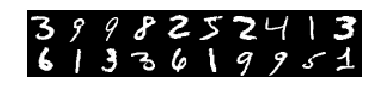

In [4]:
with tf.Graph().as_default(): 
    batch_size = 32
    dataset = tfrecord_reader.get_split('mnist', 'train', '/home/dan/prj/datasets')
    data_provider = slim.dataset_data_provider.DatasetDataProvider(
            dataset, common_queue_capacity=2*batch_size, common_queue_min=batch_size)    

    [image, label] = data_provider.get(['image', 'label'])
    with tf.Session() as sess:    
        with slim.queues.QueueRunners(sess):
            for i in range(4):
                np_image, np_label = sess.run([image, label])
                plt.imshow(np.squeeze(data_np), cmap='gray')


In [5]:
with tf.Graph().as_default(): 
    batch_size = 32
    dataset = tfrecord_reader.get_split('mnist', 'train', '/home/dan/prj/datasets')
    data_provider = slim.dataset_data_provider.DatasetDataProvider(
            dataset, common_queue_capacity=2*batch_size, common_queue_min=batch_size)    

    [image, label] = data_provider.get(['image', 'label'])
    image = (tf.to_float(image) - 128.0) / 128.0
    images, labels = tf.train.batch(
      [image, label],
      batch_size=batch_size,
      num_threads=4,
      capacity=5 * batch_size)
    #images.shape, TensorShape([Dimension(32), Dimension(28), Dimension(28), Dimension(1)])
    imgs_to_visualize = tfgan.eval.image_reshaper(images[:20,...], num_cols=10)
    # imgs_to_visualize.shape, TensorShape([Dimension(1), Dimension(56), Dimension(280), Dimension(1)])
    images = gan.visualize_digits(imgs_to_visualize)
 

In [ ]:
with tf.Session() as sess:
    sess.run(labels)

# infogan